# First CNN model

In [49]:
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [3]:
def preprocess_images(X: pd.DataFrame, resize_size: tuple)-> np.ndarray:
    """
    INPUT
    X: the DataFrame from which we want to retrieve the image names in the 'Image_name' column

    resize_size: a tuple to which dimensions the images should be resized
    For example (100, 100) resizes the images to 100 x 100 pixels

    OUTPUT
    A numpy array of shape (number of images, pixel length, pixel height, color channels)
    """

    output = []

    for image_name in X['Image_name']:
        image_path = os.path.join("../raw_data/Images/", image_name)
        image = Image.open(image_path)
        image = image.resize(resize_size) # Resizing for speed purposes
        image_array = np.array(image)
        output.append(image_array)

    return np.array(output)

In [4]:
def get_data(cache_path: Path) -> pd.DataFrame:
    """Retrieve data from `cache_path`"""
    df = pd.read_csv(cache_path, delimiter=" ", index_col="Id")
    return df

In [5]:
X_train = get_data("../raw_data/train_x.csv")
y_train = get_data("../raw_data/train_y.csv")

X_test = get_data("../raw_data/test_x.csv")
y_test = get_data("../raw_data/test_y.csv")

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
images_folder = os.path.join(parent_directory, 'raw_data', 'Images')
images_filenames = os.listdir(images_folder)

In [6]:
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

((51300, 2), (51300, 2)) ((5700, 2), (5700, 2))


In [7]:
def preprocess_images(X: pd.DataFrame, resize_size: tuple)-> np.ndarray:
    """
    INPUT
    X: the DataFrame from which we want to retrieve the image names in the 'Image_name' column

    resize_size: a tuple to which dimensions the images should be resized
    For example (100, 100) resizes the images to 100 x 100 pixels

    OUTPUT
    A numpy array of shape (number of images, pixel length, pixel height, color channels)
    """

    output = []

    for image_name in X['Image_name']:
        image_path = os.path.join("../raw_data/Images/", image_name)
        image = Image.open(image_path)
        image = image.resize(resize_size) # Resizing for speed purposes
        image_array = np.array(image)
        output.append(image_array)

    return np.array(output)

images_train, images_test = get_data("../raw_data/Images/")


In [8]:
X_train = preprocess_images(X_train, (100,100))

In [9]:
X_test = preprocess_images(X_test, (100,100))

In [10]:
X_train.shape

(51300, 100, 100, 3)

In [11]:
X_train

array([[[[202, 196, 172],
         [200, 194, 170],
         [195, 189, 165],
         ...,
         [196, 190, 168],
         [196, 190, 168],
         [196, 190, 168]],

        [[205, 199, 175],
         [201, 195, 171],
         [199, 193, 169],
         ...,
         [195, 189, 167],
         [195, 189, 167],
         [196, 190, 168]],

        [[203, 197, 173],
         [203, 197, 173],
         [203, 197, 173],
         ...,
         [193, 187, 165],
         [195, 189, 167],
         [196, 190, 168]],

        ...,

        [[ 91,  96,  73],
         [ 87,  92,  69],
         [ 88,  93,  70],
         ...,
         [ 96, 101,  78],
         [ 96, 101,  78],
         [ 96, 101,  78]],

        [[ 92,  97,  74],
         [ 87,  92,  69],
         [ 91,  96,  73],
         ...,
         [ 95, 100,  77],
         [ 95, 100,  77],
         [ 95, 100,  77]],

        [[ 90,  95,  72],
         [ 89,  94,  71],
         [ 92,  97,  74],
         ...,
         [ 94,  99,  76],
        

In [12]:
y_train = y_train['Genre_id']

In [13]:
y_train

Id
0         1
1         4
2        10
3         9
4        26
         ..
51295    17
51296    17
51297    17
51298    17
51299    17
Name: Genre_id, Length: 51300, dtype: int64

In [14]:
y_test = y_test['Genre_id']

In [15]:
(X_train.shape, y_train.shape)

((51300, 100, 100, 3), (51300,))

## Normalise train and test data - **add this to preprocessing**

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
print(X_train.shape)
print(X_test.shape)

(51300, 100, 100, 3)
(5700, 100, 100, 3)


## One-Hot-Encode target y - **add this to preprocessing**

In [18]:
y_test 

Id
0       16
1       28
2        1
3       21
4        0
        ..
5695    17
5696    17
5697    17
5698    17
5699    17
Name: Genre_id, Length: 5700, dtype: int64

In [19]:
len(np.unique(y_test))

30

In [20]:
y_train_cat = to_categorical(y_train, num_classes=30)
y_test_cat = to_categorical(y_test, num_classes=30)

In [21]:
y_train_cat.shape, y_test_cat.shape

((51300, 30), (5700, 30))

In [22]:
X_train.shape, y_train_cat.shape

((51300, 100, 100, 3), (51300, 30))

## CNN - dummy model

In [26]:
def initialize_model():
    model = models.Sequential()
    
    # Convolution 1 & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(100, 100, 3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Convolution 2 & MaxPooling
    model.add(layers.Conv2D(32, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Convolution 3 & MaxPooling
    model.add(layers.Conv2D(64, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Convolution 4 & MaxPooling
    model.add(layers.Conv2D(64, (2,2), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    # Flattening
    model.add(layers.Flatten())
    
    # Hidden Dense layer
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    
    ### Last layer - Classification Layer with 30 outputs corresponding to 30 digits
    model.add(layers.Dense(30, activation='softmax'))
    
    ## Model compilation
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

In [27]:
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 100, 100, 8)       392       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 50, 50, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        2336      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 12, 12, 64)       

In [28]:
model = initialize_model()
es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train_cat,
         validation_split = 0.2,
         epochs=5, 
         batch_size=250,
         verbose=1, 
         callbacks=[es])

Epoch 1/5
165/165 [==============================] - 68s 407ms/step - loss: 3.3527 - accuracy: 0.0506 - val_loss: 3.8345 - val_accuracy: 0.0013
Epoch 2/5
165/165 [==============================] - 62s 379ms/step - loss: 3.2776 - accuracy: 0.0713 - val_loss: 3.7585 - val_accuracy: 0.0100
Epoch 3/5
165/165 [==============================] - 60s 365ms/step - loss: 3.2072 - accuracy: 0.0944 - val_loss: 3.8047 - val_accuracy: 0.0340
Epoch 4/5
165/165 [==============================] - 59s 355ms/step - loss: 3.1491 - accuracy: 0.1092 - val_loss: 3.5287 - val_accuracy: 0.0683
Epoch 5/5
165/165 [==============================] - 55s 331ms/step - loss: 3.1052 - accuracy: 0.1240 - val_loss: 3.6179 - val_accuracy: 0.0431


In [29]:
model.evaluate(X_test, y_test_cat)[1]

179/179 [==============================] - 2s 13ms/step - loss: 3.2168 - accuracy: 0.1075


0.10754386335611343

10.8% accuracy in first model

## Improving the CNN

In [41]:
# Considering only 1/10th of the 50_000 images
reduction_factor = 10

# Choosing the random indices of small train set and small test set
idx_train =  np.random.choice(len(X_train), round(len(X_train)/reduction_factor), replace=False)
idx_test =  np.random.choice(len(X_test), round(len(X_test)/reduction_factor), replace=False)

# Collecting the two subsamples images_train_small and images_test_small from images_train and images_test
X_train_small = X_train[idx_train]
X_test_small = X_test[idx_test]
# and their corresponding labels
y_train_small = y_train_cat[idx_train]
y_test_small = y_test_cat[idx_test]

print("------------------ Before -----------------")
print(X_train.shape, X_test.shape)

print("")

print("--- After applying the reduction factor ---")
print(X_train_small.shape, X_test_small.shape)

print("")
print("-"*43)

unique, counts = np.unique(y_train_small, return_counts=True)
dict(zip(unique, counts))

------------------ Before -----------------
(51300, 100, 100, 3) (5700, 100, 100, 3)

--- After applying the reduction factor ---
(5130, 100, 100, 3) (570, 100, 100, 3)

-------------------------------------------


{0.0: 148770, 1.0: 5130}

In [42]:
X_train.shape, X_train_small.shape, y_train_small.shape

((51300, 100, 100, 3), (5130, 100, 100, 3), (5130, 30))

In [43]:
def initialize_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model = models.Sequential()
    model.add(layers.Conv2D(16, (3,3), input_shape=(100, 100, 3), padding='same', strides=(1,1), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(32, (2,2), padding='same', strides=(1,1), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, (2,2), padding='same', strides=(1,1), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())

    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(30, activation='softmax'))
    
    # compile model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [45]:
model = initialize_model()

es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train_cat,
         validation_split = 0.2,
         epochs=50, 
         batch_size=32,
         verbose=1, 
         callbacks=[es])

Epoch 1/50
1283/1283 [==============================] - 68s 53ms/step - loss: 3.3323 - accuracy: 0.0559 - val_loss: 3.7759 - val_accuracy: 0.0196
Epoch 2/50
1283/1283 [==============================] - 58s 45ms/step - loss: 3.2242 - accuracy: 0.0867 - val_loss: 3.6021 - val_accuracy: 0.0508
Epoch 3/50
1283/1283 [==============================] - 59s 46ms/step - loss: 3.1382 - accuracy: 0.1097 - val_loss: 3.6029 - val_accuracy: 0.0691
Epoch 4/50
1283/1283 [==============================] - 56s 44ms/step - loss: 3.0768 - accuracy: 0.1241 - val_loss: 3.5496 - val_accuracy: 0.0612
Epoch 5/50
1283/1283 [==============================] - 58s 45ms/step - loss: 3.0239 - accuracy: 0.1366 - val_loss: 3.5050 - val_accuracy: 0.0638
Epoch 6/50
1283/1283 [==============================] - 55s 43ms/step - loss: 2.9669 - accuracy: 0.1500 - val_loss: 3.5308 - val_accuracy: 0.0685
Epoch 7/50
1283/1283 [==============================] - 57s 44ms/step - loss: 2.9105 - accuracy: 0.1602 - val_loss: 3.5838 -

In [47]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<AxesSubplot:title={'center':'loss'}>,
 <AxesSubplot:title={'center':'Accuracy'}>)

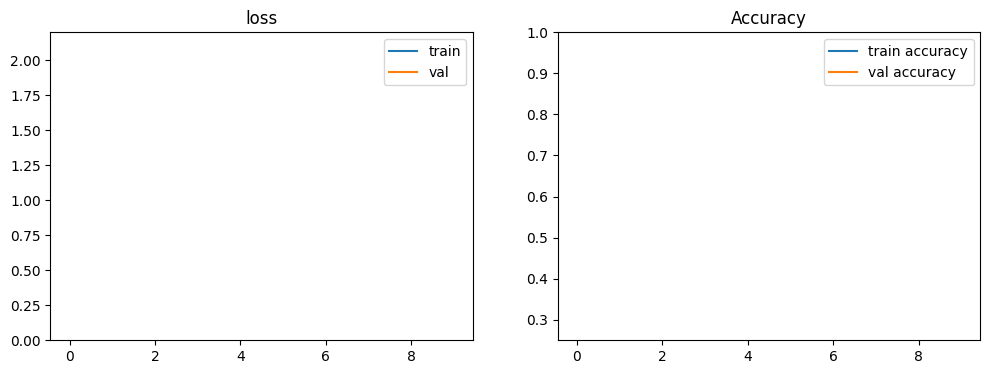

In [50]:
plot_history(history)

In [46]:
model.evaluate(X_test, y_test_cat)[1]

179/179 [==============================] - 2s 13ms/step - loss: 3.1592 - accuracy: 0.1249


0.12491228431463242